### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

In [141]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data modelling
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)

In [2]:
# Load dataset into a dataframe
data = pd.read_csv("HR_capstone_dataset.csv")
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Data Exploration

In [4]:
df= data.copy()

In [5]:
df.shape

(14999, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
# rename columns 
df.columns.to_list()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

In [11]:
df.rename(columns = {
    'average_montly_hours':'average_monthly_hours',
    'time_spend_company':'tenure',
    'Work_accident':'work_accident',
    'Department':'department'
}, inplace = True)
df.columns.to_list()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'tenure',
 'work_accident',
 'left',
 'promotion_last_5years',
 'department',
 'salary']

In [13]:
# checking missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [15]:
# checking for duplicates
df.duplicated().sum()

3008

In [18]:
# drop the duplicates
df = df.drop_duplicates(keep= 'first')

In [17]:
df.duplicated().sum()

0

Check for Outliers

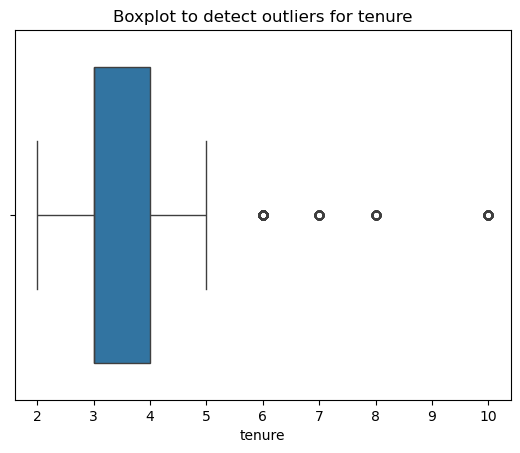

In [19]:
# check for outliers in 'tenure'
sns.boxplot(data = df, x = 'tenure')
plt.title('Boxplot to detect outliers for tenure')
plt.xlabel('tenure')
plt.show()

In [22]:
# Determine the number of rows containing outliers
# using interquantile range
q1=df['tenure'].quantile(0.25)
q3=df['tenure'].quantile(0.75)
iqr = q3-q1
# limits
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

outliers = df[(df['tenure']<lower_limit) | (df['tenure'] > upper_limit)]

print('Number of rows containing Outliers:',len(outliers),'rows')

Number of rows containing Outliers: 824 rows


In [23]:
# remove the outliers will use this data set later when making the model
#df2 = df[(df['tenure'] >= lower_limit) & (df['tenure'] <= upper_limit)]
#df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low


### Analyze Stage

Understanding how many employees left and what percentage of all employees this figure represents.

In [31]:
print('Number of Employees who:', df['left'].value_counts())
print('Percentage of Employees who:',df['left'].value_counts(normalize = True)*100)



Number of Employees who: left
0    10000
1     1991
Name: count, dtype: int64
Percentage of Employees who: left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


* The number of employees who stayed in the company is 10,000.
* The number of employees who left the company is 1,991.
* The percentage of employees who stayed in the company is approximately 83.4%.
* The percentage of employees who left the company is approximately 16.6%.

### Data Visualizations

Pie chart to show the distribution of employees who left the company versus those who stayed, providing a clear visualization of the overall attrition rate

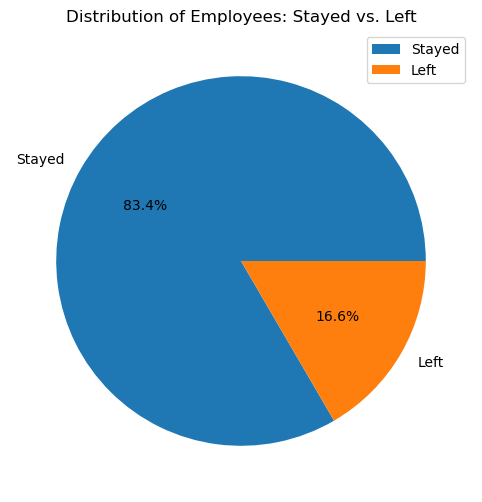

In [34]:
attrittion = df['left'].value_counts()
labels = ['Stayed', 'Left']
colors = ['green', 'red']

plt.figure(figsize = (8,6))
plt.pie(attrittion, labels = labels, autopct='%1.1f%%')
plt.title('Distribution of Employees: Stayed vs. Left')
plt.legend()
plt.show()

Distributions within the numerical features based on who stayed or left.

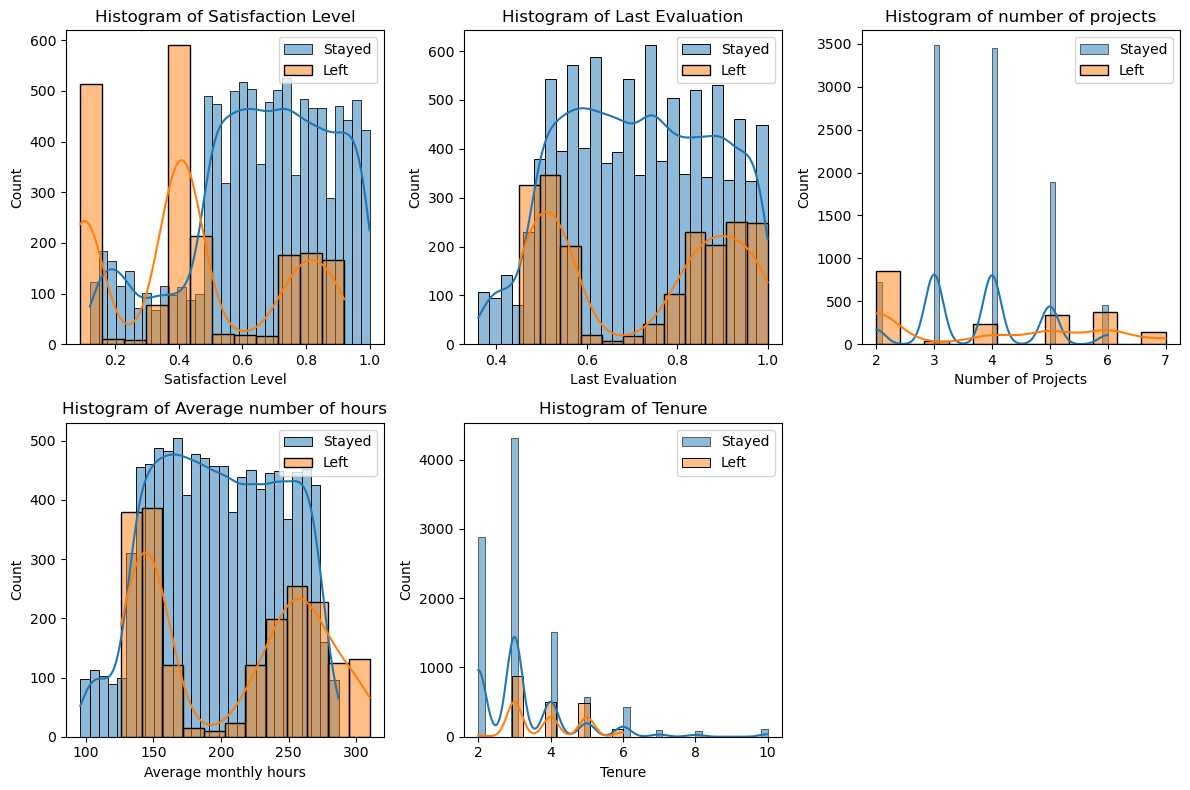

In [37]:
plt.figure(figsize=(12,8))

#Satisfaction level
plt.subplot(2,3,1)

sns.histplot(df[df['left']==0]['satisfaction_level'], kde=True, label="Stayed")
sns.histplot(df[df['left']==1]['satisfaction_level'], kde=True, label='Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.title('Histogram of Satisfaction Level')
plt.legend()

#Last Evaluation
plt.subplot(2,3,2)
sns.histplot(df[df['left']==0]['last_evaluation'], kde=True, label="Stayed")
sns.histplot(df[df['left']==1]['last_evaluation'], kde=True, label='Left')
plt.xlabel('Last Evaluation')
plt.ylabel('Count')
plt.title('Histogram of Last Evaluation')
plt.legend()

#Number of Projects
plt.subplot(2,3,3)
sns.histplot(df[df['left']==0]['number_project'], kde=True, label="Stayed")
sns.histplot(df[df['left']==1]['number_project'], kde=True, label='Left')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.title('Histogram of number of projects')
plt.legend()

#Average monthly hours
plt.subplot(2,3,4)
sns.histplot(df[df['left']==0]['average_monthly_hours'], kde=True, label="Stayed")
sns.histplot(df[df['left']==1]['average_monthly_hours'], kde=True, label='Left')
plt.xlabel('Average monthly hours')
plt.ylabel('Count')
plt.title('Histogram of Average number of hours')
plt.legend()

#Tenure
plt.subplot(2,3,5)
sns.histplot(df[df['left']==0]['tenure'], kde=True, label="Stayed")
sns.histplot(df[df['left']==1]['tenure'], kde=True, label='Left')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Histogram of Tenure')
plt.legend()

plt.tight_layout()
plt.show()

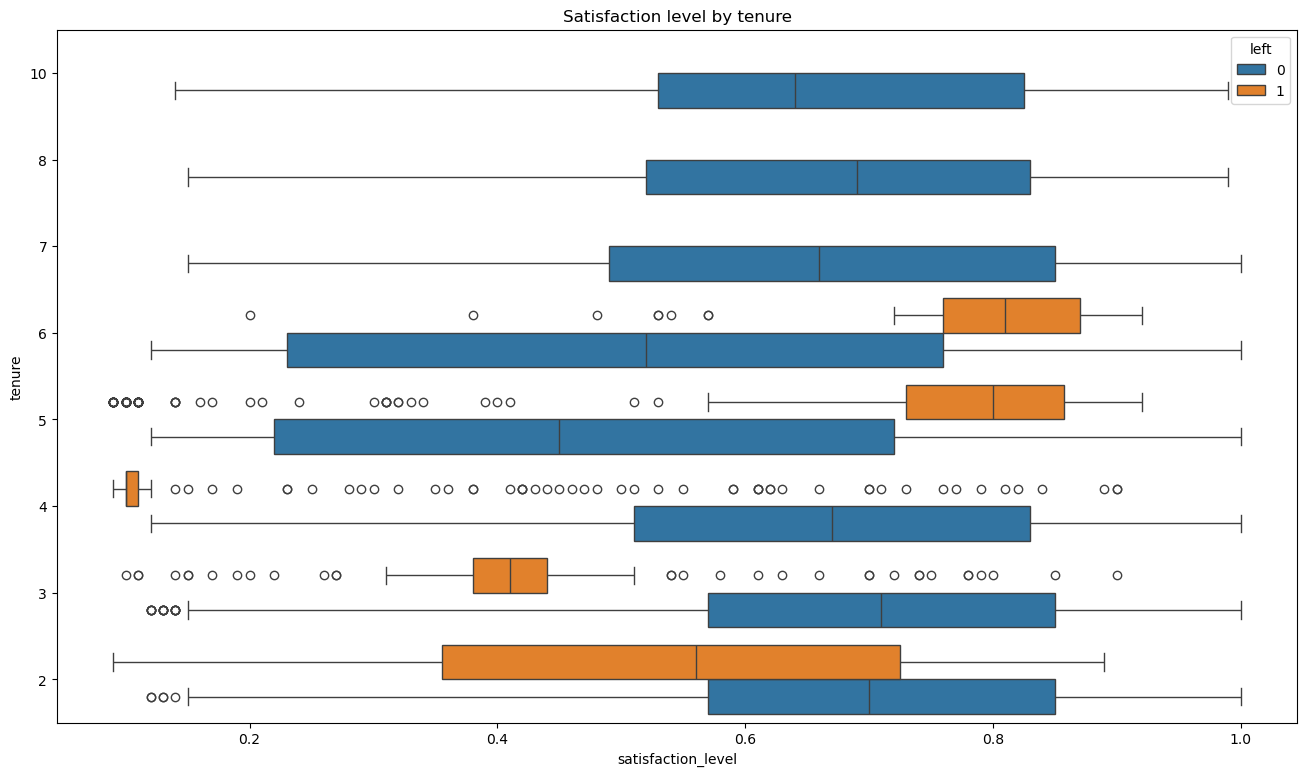

In [38]:
# satisfaction by tenure
fig, ax = plt.subplots(1, figsize=(16, 9))
sns.boxplot(data=df, x='satisfaction_level', y='tenure', hue='left', orient="h",ax=ax)
ax.invert_yaxis()
ax.set_title('Satisfaction level by tenure')
plt.show()

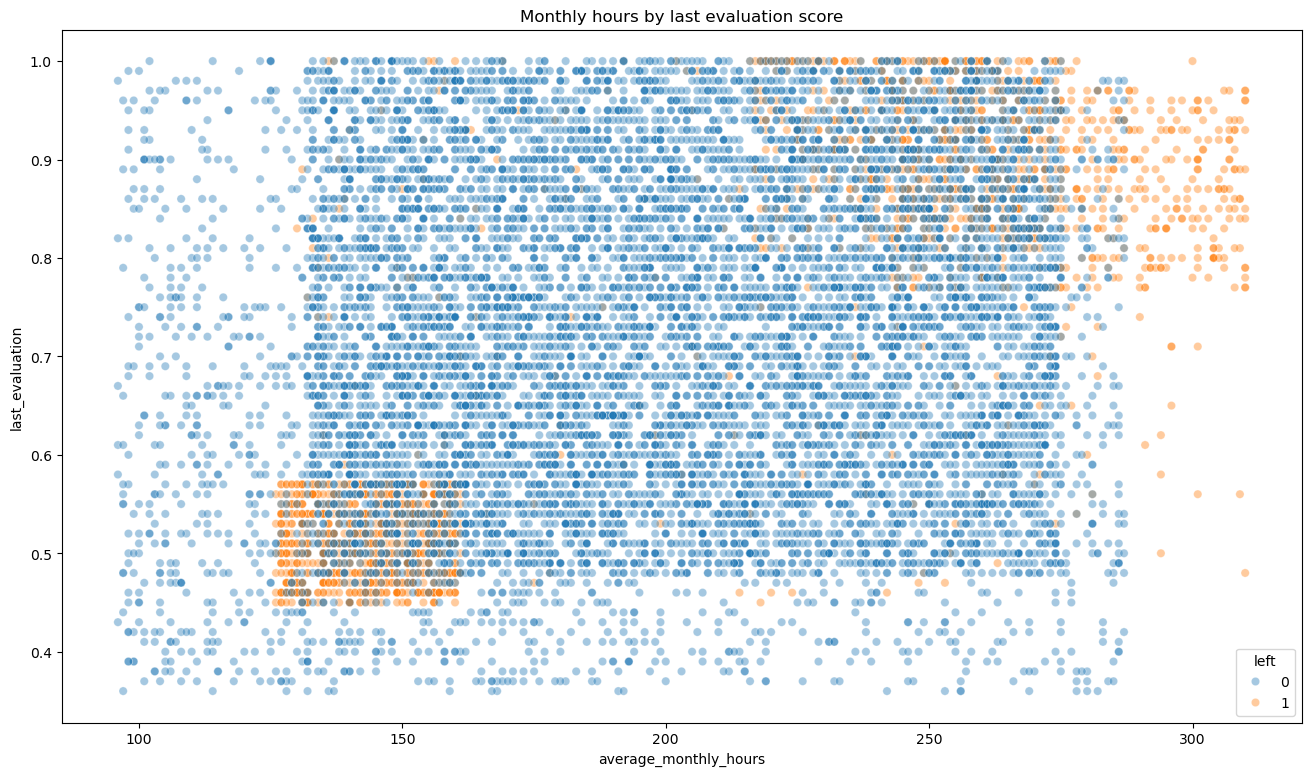

In [39]:
# average monthly hours vs last evaluation
plt.figure(figsize= (16,9))
sns.scatterplot(data = df, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left', alpha = 0.4)
plt.title('Monthly hours by last evaluation score')
plt.show()

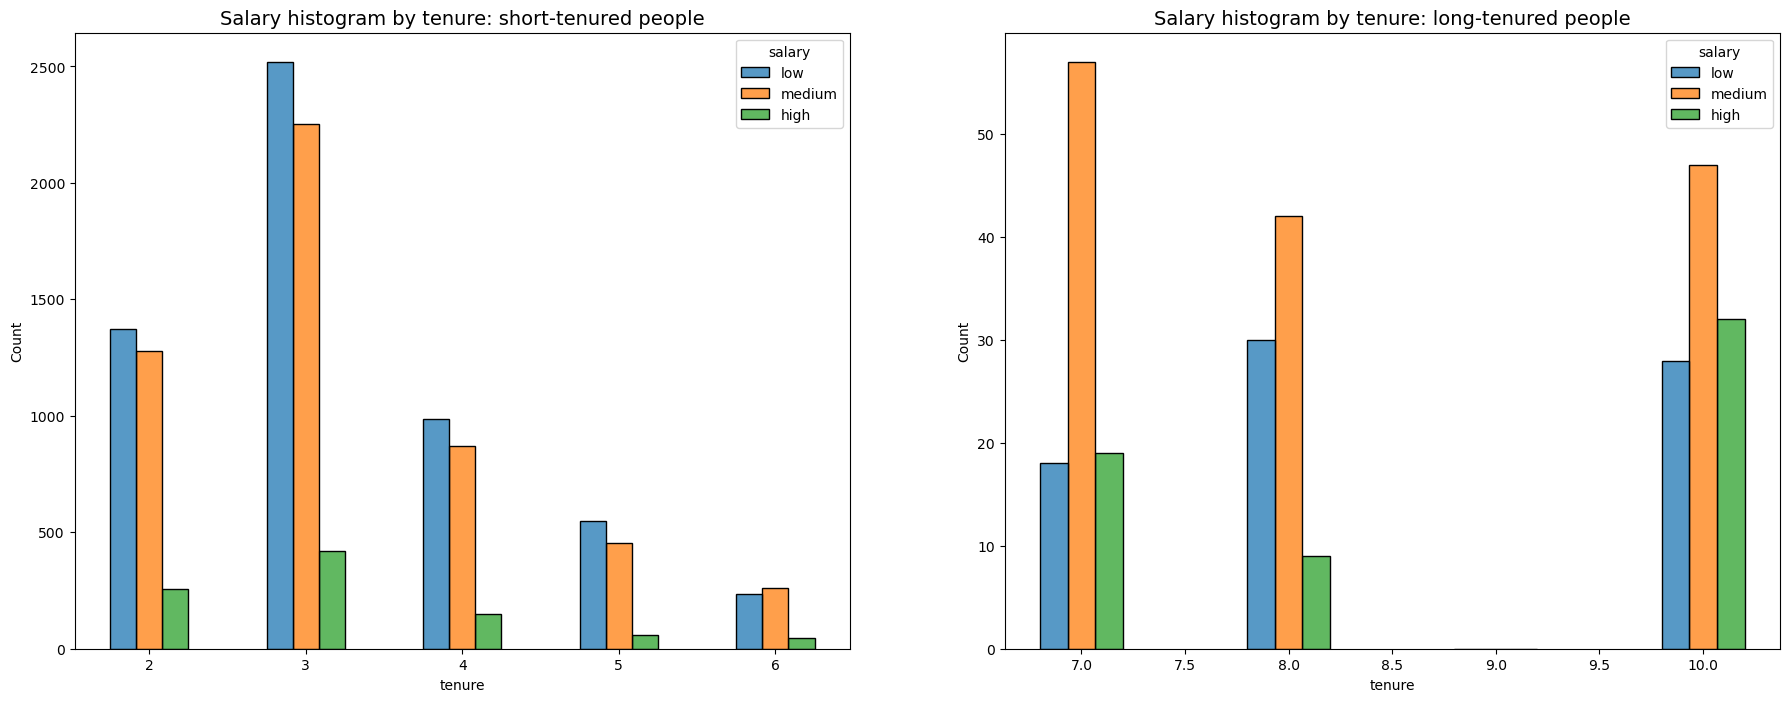

In [41]:
# number of projects by tenure
fig, ax = plt.subplots(1, 2, figsize = (22,8))
tenure_short = df[df['tenure'] < 7]
tenure_long = df[df['tenure'] > 6]

sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize = 14)

sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize = 14);

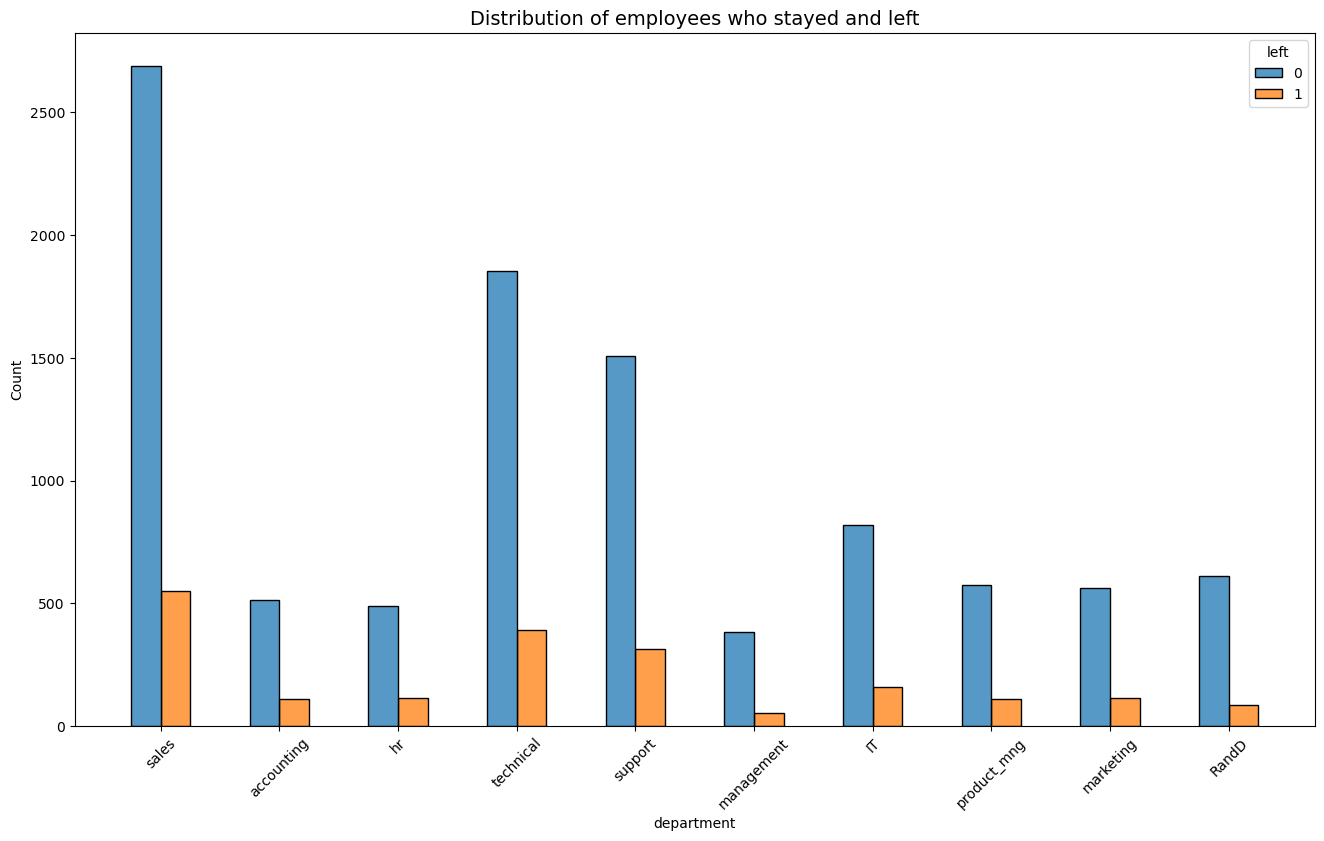

In [42]:
# number of employees who left/stayed per department
plt.figure(figsize = (16,9))
sns.histplot(data = df, x= 'department', hue = 'left', multiple='dodge', shrink = 0.5 )
plt.xticks(rotation = 45)
plt.title('Distribution of employees who stayed and left', fontsize = 14)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

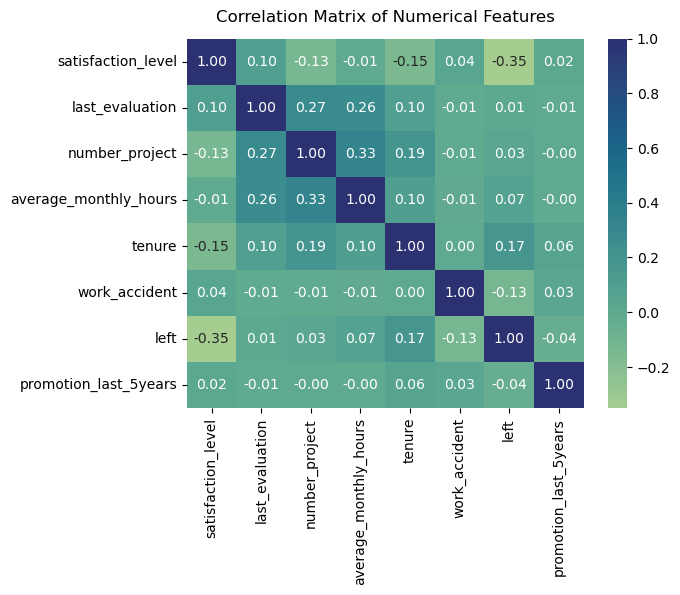

In [44]:
# determining any correlation
num_features = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years']]
plt.figure(figure = (16,9))
heatmap = sns.heatmap(num_features.corr(), annot = True, cmap='crest', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', pad = 12)

### Insights

* Consider allocating about 3 to 4 projects per employee.
* Majority of employees leave after 3 years of tenure.
* Employees with lower satisfaction level of tend to leave the company often.
* Shorter working hours could help reduce employee attrittion.
* Promotions, less projects, and shorter work hours could lead to more motivated employees to achieve better evaluations scores by performing better, thus leading to higher satisfaction scores and staying with the company

## Construct Stage

### Logistic regression

### Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size


In [52]:
df_model

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [54]:
df_model = df.copy()

# one-hot encode department
df_model = pd.get_dummies(df_model, columns =[ 'department'],drop_first = True)

# ordinal encode salary
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}
df_model['salary'] = df_model['salary'].map(salary_mapping)

df_model.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False


In [57]:
# remove outliers in the df_model 
q1 = df_model['tenure'].quantile(0.25)
q3 = df_model['tenure'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
df_model = df_model[(df_model['tenure'] >= lower_limit) & (df_model['tenure'] <= upper_limit)]
df_model.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,True,False,False


Feature Selection

In [58]:
y = df_model['left']
X = df_model.drop('left', axis = 1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [60]:
log_clf = LogisticRegression(random_state = 42, max_iter = 500).fit(X_train, y_train)

In [61]:
y_pred = log_clf.predict(X_test)

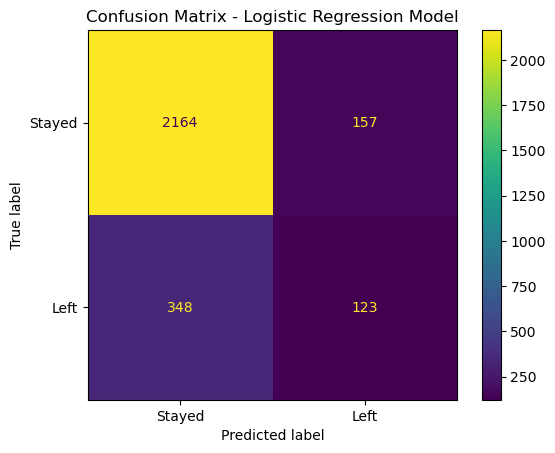

In [63]:
# create a confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
display_labels=['Stayed', 'Left'])
disp.plot()
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

* The upper-left quadrant displays the number of True Negatives: the number of people who did not leave that the model accurately predicted did not leave.
* The upper-right quadrant displays the number of False Positives: the number of people who did not leave the model inaccurately predicted as leaving.
* The lower-left quadrant displays the number of False Negatives: The number of people who left that the model inaccurately predicted did not leave.
* The lower-right quadrant displays the number of True Positives: the number of people who left the model accurately predicted as leaving.

In [68]:
target_names = ['Predicted would not leave', 'Predicted would stay']
print(classification_report(y_test,y_pred, target_names = target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
     Predicted would stay       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



1. Logistic model achieved a precision of 79%, recall of 82%, f1-score of 80% and accuracy score of 82%.
2. The scores are really low to be able to predict employees who leave.

## Random Forest Classifier

In [70]:
# it is robust to outliers
df_rf = df.copy()

In [71]:
# one-hot encode department
df_rf = pd.get_dummies(df_rf, columns =[ 'department'],drop_first = True)

# ordinal encode salary
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}
df_rf['salary'] = df_rf['salary'].map(salary_mapping)

df_rf.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False


In [72]:
# feature selection
y = df_model['left']
X = df_model.drop('left', axis = 1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [117]:
# initialize the model
rf = RandomForestClassifier(random_state = 42)

# define parameter grid
cv_params = {'max_depth': [5, 6, 7],
    'max_features': [1.0],
    'max_samples': [0.7],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [50, 100],}

scoring=['accuracy', 'precision', 'recall', 'f1']

rf1 = GridSearchCV(rf,cv_params,scoring = scoring, cv=5, refit = 'f1')

In [118]:
%%time
rf1.fit(X_train, y_train)

CPU times: total: 1min 39s
Wall time: 1min 40s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 6, 7], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [119]:
print('Best Score:', rf1.best_score_)
print('Best parameters:',rf1.best_params_)
print('Best estimator:',rf1.best_estimator_)

Best Score: 0.9524093422968537
Best parameters: {'max_depth': 7, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best estimator: RandomForestClassifier(max_depth=7, max_features=1.0, max_samples=0.7,
                       random_state=42)


**Evaluate the Model**


In [131]:
# evaluate the model
best_rf = RandomForestClassifier(max_depth=7, max_features=1.0, max_samples=0.7,
                       random_state=42, n_estimators = 100)

# Fit the model to the training data
best_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf.predict(X_test)


In [132]:
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision
precision = precision_score(y_test, y_pred)
# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy:}')
print(f'precision: {precision:}')
print(f'recall: {recall:}')
print(f'f1 score: {f1:}')

Accuracy: 0.9874641833810889
precision: 0.9887892376681614
recall: 0.9363057324840764
f1 score: 0.9618320610687023


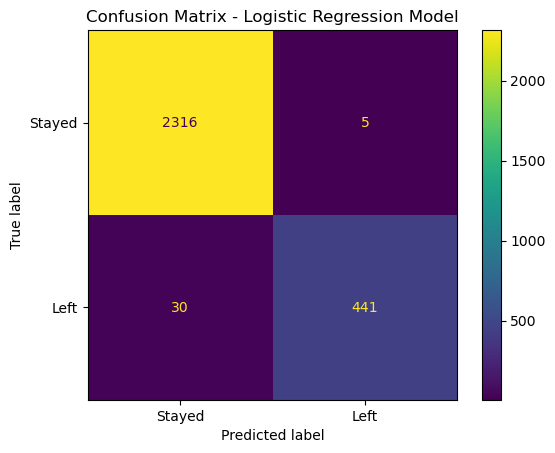

In [133]:
cm_rf = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
display_labels=['Stayed', 'Left'])
disp.plot()
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

In [134]:
best_rf.feature_importances_

array([5.03941640e-01, 1.24824159e-01, 1.45671017e-01, 5.91059029e-02,
       1.60248030e-01, 2.63557568e-04, 2.44975496e-05, 1.50187138e-03,
       3.43309848e-04, 6.80704507e-04, 3.22935781e-04, 2.21964106e-04,
       4.83288931e-04, 3.43062082e-04, 6.66575634e-04, 3.58435030e-04,
       9.99049098e-04])

In [135]:
best_rf.feature_importances_.sum()

0.9999999999999999

In [139]:
   feature_importance = pd.DataFrame({
       'Feature': X.columns,
       'Importance': best_rf.feature_importances_
   })
feature_importance.sort_values(by= 'Importance', ascending = False)
feature_importance

,Feature,Importance
0,satisfaction_level,0.503942
1,last_evaluation,0.124824
2,number_project,0.145671
3,average_monthly_hours,0.059106
4,tenure,0.160248
5,work_accident,0.000264
6,promotion_last_5years,0.000024
7,salary,0.001502
8,department_RandD,0.000343
9,department_accounting,0.000681


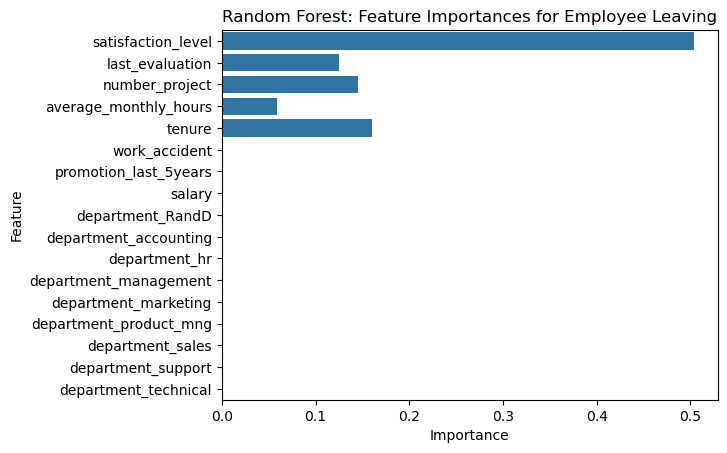

In [140]:
sns.barplot(data = feature_importance,x ='Importance', y = 'Feature')
plt.title('Random Forest: Feature Importances for Employee Leaving')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Insights
* The Random Forest Model reveals  that the most significant predictor of employee attrition is **satisfaction level**.
This is a determining factor of whether an employee decides to stay or leave.
  

## Execute

**Model Summary**

Logistic Regression

* Logistic model achieved a precision of 79%, recall of 82%, f1-score of 80% and accuracy score of 82%.

Tree-based Machine Learning

* After conducting feature engineering, the random forest performed significantly better with high accuracy of 98%.

**Conclusion**

* Employee satisfaction, last evaluation scores, average monthly hours, and tenure and work hours were significant predictors of attrition.

**Recommendations**
* **Improve Employee Satisfaction:** Foster a positive work environment, encourage open communication, and address employee concerns to boost satisfaction levels.
* **Work-Life Balance:** Ensure a healthy work-life balance to prevent burnout and improve overall well-being.
* **Career Growth Opportunities:** Offer career development programs and clear pathways for growth to enhance employee engagement and retention.
* **Exit Interviews:** Conduct thorough exit interviews to understand reasons for turnover and identify areas for improvement.